# Final Project

# Install required library

In [29]:
%pip install "pycaret[full]"

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Display Version

In [30]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

# Import data and show the categories

In [31]:
import pandas as pd
# Import the specific hour.csv file
df = pd.read_csv('hour.csv')

# Features to ignore based on provided document

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Set Dropped and Categorical Features and setup for analysis

In [32]:
from pycaret.regression import *

ignored_features = ['instant', 'dteday', 'casual', 'registered']    
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

s = setup(data=df, 
          target='cnt', 
          session_id=123, 
          ignore_features=ignored_features, 
          categorical_features=categorical_features
          ) 

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 17)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Ignore features,4
8,Numeric features,4
9,Categorical features,8


# Compare models

In [33]:
best = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.3580
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.8170
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.4340
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.0590
rf,Random Forest Regressor,33.1187,2792.8494,52.7501,0.9145,0.4857,0.5690,0.9460
dt,Decision Tree Regressor,44.3214,5734.5036,75.4889,0.8245,0.5839,0.6017,0.0660
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.2450
knn,K Neighbors Regressor,67.7478,10027.7728,100.0659,0.6930,0.9044,2.0863,0.0760
ridge,Ridge Regression,75.2100,10299.7005,101.4540,0.6843,1.0327,2.8897,0.0500
br,Bayesian Ridge,75.2068,10299.6365,101.4536,0.6843,1.0326,2.8880,0.0600


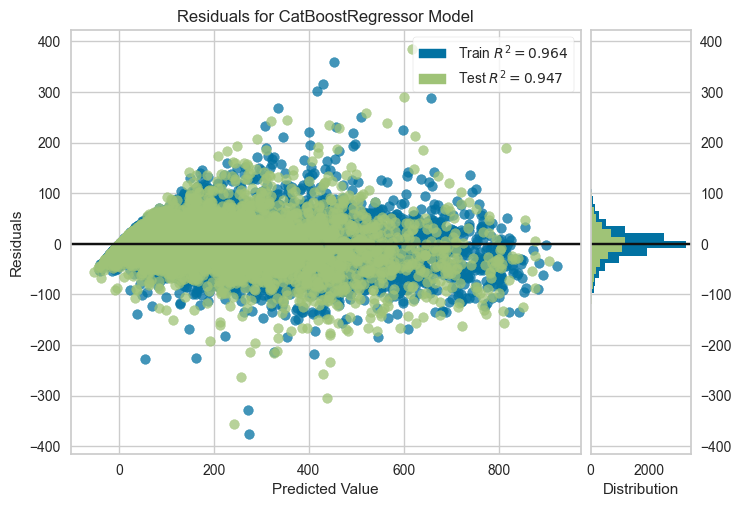

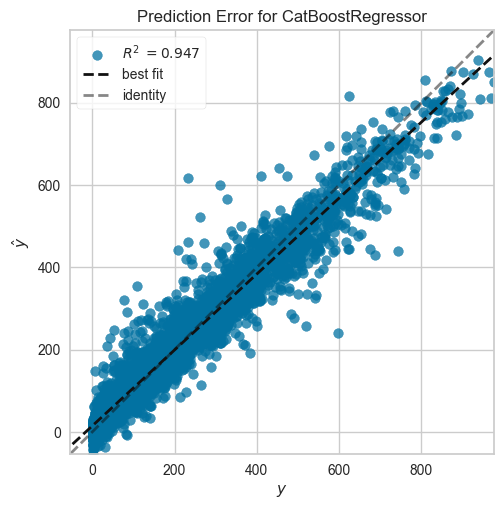

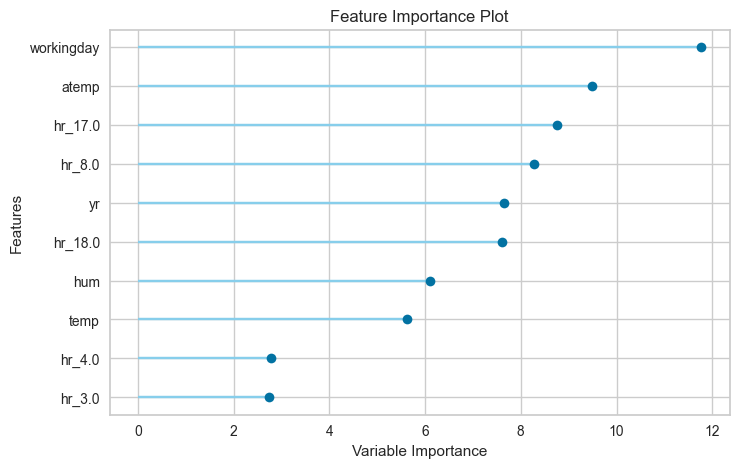

In [34]:
# Plot Residuals
plot_model(best, plot='residuals')

# Plot Errors
plot_model(best, plot='error') 

# Plot Feature Importance
plot_model(best, plot='feature')


In [35]:
best_pred = predict_model(best)
best_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,27.9575,1783.9677,42.2370,0.9466,0.5092,0.5831


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,290.426510
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,434.383148
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,127.786476
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,293.307739
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,382.412987


# Analysis of Runner up Extra Trees Regression

In [36]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.2578,2276.4436,47.7121,0.9274,0.3865,0.3760
1,28.2905,2120.4638,46.0485,0.9364,0.4065,0.3921
2,27.9399,2201.2526,46.9175,0.9341,0.4068,0.4214
3,28.3976,2330.7010,48.2773,0.9297,0.3954,0.4331
4,24.7609,1559.3642,39.4888,0.9472,0.3807,0.3646
5,27.0611,2118.0972,46.0228,0.9341,0.3848,0.3558
6,29.9404,2641.1434,51.3921,0.9214,0.4026,0.3886
7,27.1825,2034.8392,45.1092,0.9423,0.3956,0.3851
8,31.1504,3278.0520,57.2543,0.8970,0.4220,0.4074


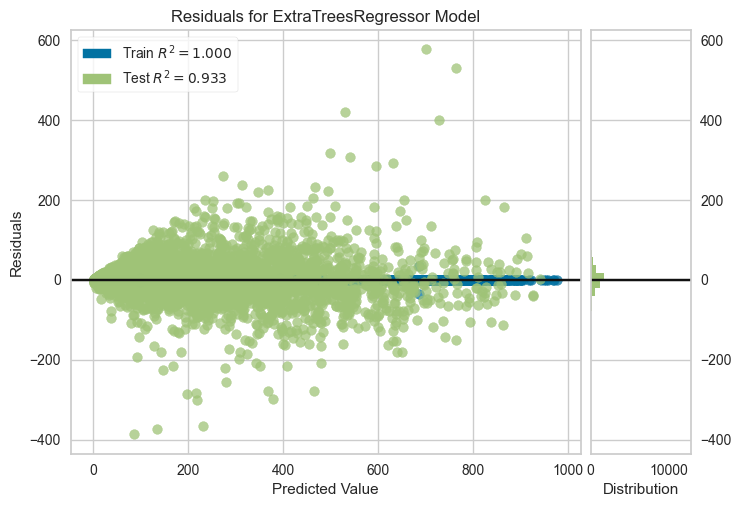

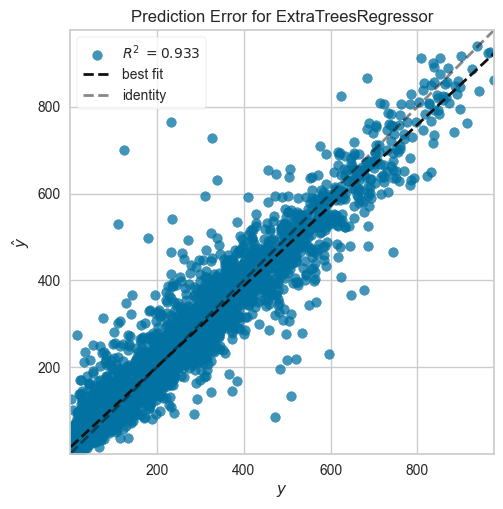

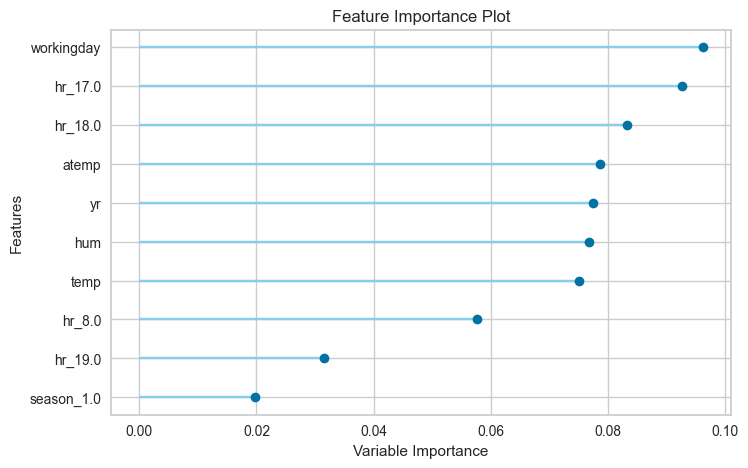

In [37]:
# Plot Residuals
plot_model(et, plot='residuals')

# Plot Errors
plot_model(et, plot='error') 

# Plot Feature Importance
plot_model(et, plot='feature')


In [38]:
et_pred = predict_model(et)
et_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.0301,2235.5564,47.2817,0.9331,0.3761,0.3662


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,293.24
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,420.54
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,95.73
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,305.10
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,391.20
